In [4]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

import pysac.mhs_atmosphere as atm

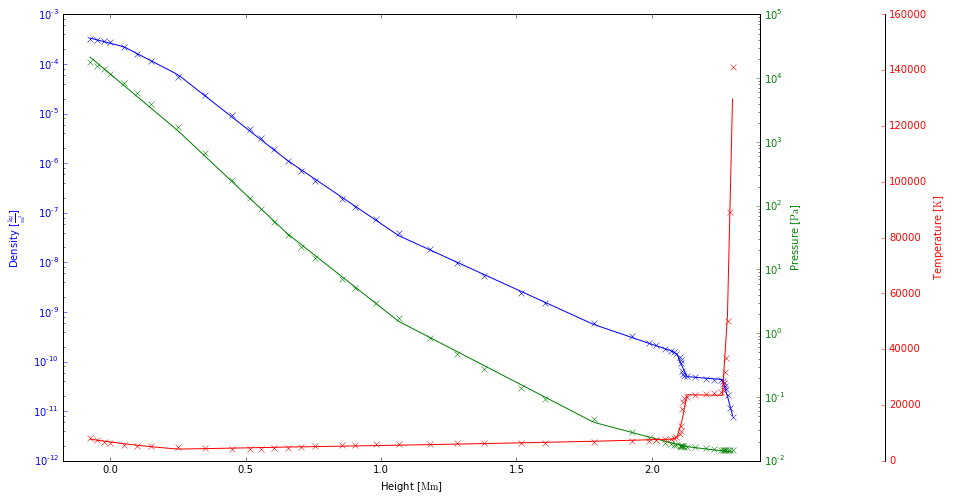

In [8]:
#Read in the VAL3C model
empirical_data = atm.hs_atmosphere.read_VAL3c_MTW(MTW_file=False)

# Create a Z array at the interpolated resolution and interpolate.
ZZ = u.Quantity(np.linspace(empirical_data['Z'][0], empirical_data['Z'][-1], 128), unit=empirical_data['Z'].unit)
table = atm.hs_atmosphere.interpolate_atmosphere(empirical_data, ZZ)

# Create a figure and make space for the axes.
fig, ax = plt.subplots(gridspec_kw={'right':0.775, 'left':0.13}, figsize=(15,8))

# Shortcut all the Mm conversion.
Z = empirical_data['Z'].to(u.Mm)

lrho, = ax.plot(Z, empirical_data['rho'].quantity.si, 'x', color='blue')
lrho_i, = ax.plot(ZZ.to(u.Mm), table['rho'].quantity.si, color='blue')

ax2 = ax.twinx()
lp, = ax2.plot(Z, empirical_data['p'].to(u.Pa), 'x', color='green')
lp_i, = ax2.plot(ZZ.to(u.Mm), table['p'].to(u.Pa), color='green')


ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.18))
lt, = ax3.plot(Z, empirical_data['T'], 'x', color='red')
lt_i, = ax3.plot(ZZ.to(u.Mm), table['T'], color='red')


# Set primary axes properties and labels
ax.semilogy()
ax.set_ylabel(r"Density [{}]".format(lrho._yorig.unit._repr_latex_()))
ax.set_xlabel(r"Height [{}]".format(lrho._xorig.unit._repr_latex_()))
ax.set_xlim(Z[0].value-0.1, Z[-1].value+0.1)


# Pressure Axis
ax2.semilogy()
ax2.set_ylabel(r"Pressure [{}]".format(lp._yorig.unit._repr_latex_()))


# Temp axis
ax3.set_ylabel(r"Temperature [{}]".format(lt._yorig.unit._repr_latex_()))

# Set the colours for the ticks and the labels.
ax.tick_params(axis='y', colors=lrho.get_color())
ax2.tick_params(axis='y', colors=lp.get_color())
ax3.tick_params(axis='y', colors=lt.get_color())

ax.yaxis.label.set_color(lrho.get_color())
ax2.yaxis.label.set_color(lp.get_color())
ax3.yaxis.label.set_color(lt.get_color())

fig